# 3.  Mean Shift

Mean Shift adalah salah satu algoritma Unsupervised Learning (Pembelajaran Tanpa Pengawasan). Mean Shift memiliki cara kerja dengan menghitung semua titik yang ada pada data untuk mencari nilai mean(rata-rata) yang akan digunakan sebagai pusat(center) kluster nya. Perhitungan mean dilakukan untuk tiap data yang berdekatan dan masih memenuhi batas yang telah ditentukan. Nilai mean ini akan menjadi label dan digunakan sebagai pusat cluster. Proses seperti ini terus diulang sampai semua data konvergen. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

* **import numpy** digunakan untuk memanggil library numpy yang berfungsi untuk mengolah array, matriks, dan linear aljabar. 
* **matplotlib** adalah library pada python yang digunakan untuk memvisualisasikan data
* **sklearn** atau scikit-learn adalah library pada python yang digunakan dalam machine learning. Library ini banyak memuat model-model machine learning. Dalam kasus kali ini digunakan model **Mean Shift** yang digunakan untuk melakukan clustering.
* Pada program ini juga digunakan **cycle** yang merupakan bagian dari module **itertools**. **cycle** digunakan untuk melakukan perulangan sampai semua data mencapai konvergen. 

In [2]:
# Load data from input file
X = np.loadtxt('data_clustering.txt', delimiter=',')

* Pada perintah diatas didefinisikan data **X** yang akan digunakan sebagai masukan untuk model Mean Shift ini.
* Data **X** akan dilakukan clustering untuk memetakan data ke label-label tertentu.

In [3]:
# Estimate the bandwidth of X
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

* **estimate_bandwidth** digunakan untuk menentukan batasan atau jumlah data yang akan dihitung pada setiap cycle nya. Dalam hal ini quantile yang digunakan adalah 0.1.

In [4]:
# Cluster data with MeanShift
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

MeanShift(bandwidth=1.3044799765090382, bin_seeding=True)

* Pada listing diatas, dilakukan pemodelan Mean Shift untuk melakukan clustering pada data X
* Selanjutnya dilakukan juga Training model menggunakan perintah **.fit** dengan data masukan **X**

In [5]:
# Extract the centers of clusters
cluster_centers = meanshift_model.cluster_centers_
print('\nCenters of clusters:\n', cluster_centers)


Centers of clusters:
 [[2.95568966 1.95775862]
 [7.20690909 2.20836364]
 [2.17603774 8.03283019]
 [5.97960784 8.39078431]
 [4.99466667 4.65844444]]


* Dari hasill Pemodelan dan Training diatas didapatkan bahwa data X memiliki 5 label atau pusat cluster dengan titik koordinat(x,y) ditampilkan diatas.

In [6]:
# Estimate the number of clusters
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print("\nNumber of clusters in input data =", num_clusters)


Number of clusters in input data = 5


* Jumlah cluster diestimasikan berjumlah 5, artinya terdapat 5 titik pusat cluster pada data **X**.

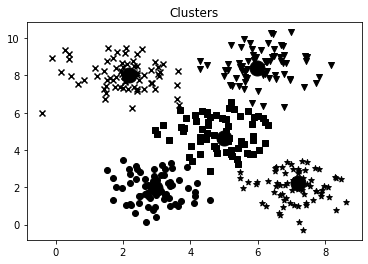

In [7]:
# Plot the points and cluster centers
plt.figure()
markers = 'o*xvs'
for i, marker in zip(range(num_clusters), markers):
    # Plot points that belong to the current cluster
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='black')

    # Plot the cluster center
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o', 
            markerfacecolor='black', markeredgecolor='black', 
            markersize=15)

plt.title('Clusters')
plt.show()

* Berikut adalah hasil clustering yang didapatkan, terdapat 5 titik pusat cluster yang memiliki titik-titik data sebagai anggota class nya. 
* Beberapa cluster ini digambarkan dengan simbol **x**,**segitiga**,**kotak**,**lingkaran** dan **bintang**. 
* Setiap anggota cluster akan terpusat menuju titik pusat clusternya. Kondisi inilah yang dinamakan **Konvergen**